# ASH_Peak_Plotting

In [35]:
import pandas as pd
import matplotlib.pyplot as plt 
import os
import csv
import glob
import seaborn as sns
import numpy as np

In [56]:
# enter pathway of where files are saved 
# C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys\ExtractedData\WCC\TU2769
fpath = 'C:/Users/LingxinW/Box/Wang/Everyday working folders/Ephys_recording/ALM_ephys\ExtractedData\WCC\TU2769'
all_files = glob.glob(fpath + "/*.csv")

In [57]:
pwd

'C:\\Users\\LingxinW\\Google Drive\\PythonScripts\\EphysAnalysis'

In [58]:
# put all individual csv dataframe files into one dataframe file df
analysis = pd.DataFrame()
for x in all_files:
    df = pd.read_csv(x)
    #f['t_half_act_on'][0]= ''
    analysis=pd.concat([analysis,df])
analysis.head(100)

,worm_strain,cell_ID,stim_um,amp_peaks_max,amp_peaks_stb,capacitance,group_number
0,TU2769,ALMLW002,-80,-22.653938,-22.883975,1.87,4
1,TU2769,ALMLW002,-60,-14.644686,-14.577675,1.87,4
2,TU2769,ALMLW002,-40,-8.249156,-9.429284,1.87,4
3,TU2769,ALMLW002,-20,-5.014099,-5.257352,1.87,4
4,TU2769,ALMLW002,0,3.410238,-3.251122,1.87,4
...,...,...,...,...,...,...,...
4,TU2769,ALMLW033,0,2.844079,-4.843009,1.66,4
5,TU2769,ALMLW033,20,9.010380,-2.456454,1.66,4
6,TU2769,ALMLW033,40,17.519524,0.840272,1.66,4
7,TU2769,ALMLW033,60,40.585539,8.185184,1.66,4


No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


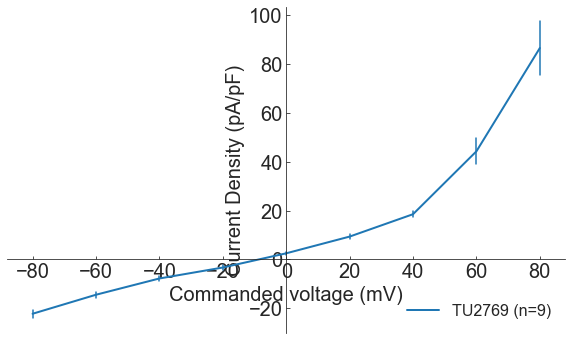

In [59]:
# plot the figures using seaborn 
# plot max peak amplitude

sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
#sns.despine(offset=2, trim=True, top = False, right = False)
plt.rcParams.update({'font.size': 20})
plt.rcParams['svg.fonttype'] = 'none'

#%% plotting specific data from dataframe
#order = ['TU2769', 'GN932']
#xticklabels = ['WT', 'mutant']


plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
sns.despine(right=True) # remove axis spines of right and up

fig = sns.lineplot(x='stim_um', y='amp_peaks_max', data=analysis, hue = 'worm_strain', err_style ='bars', lw=2)
handles, labels = fig.get_legend_handles_labels() # and next line code to remove legend title
plt.legend(handles=handles[1:], labels=labels[1:])#

# move x and y axis to 0,0 intersection
fig.spines['left'].set_position(('data', 0))
fig.spines['bottom'].set_position(('data', 0))
plt.legend(['TU2769 (n=9)'], frameon = False, prop={'size': 16}, loc = "lower right") # change figure label from strain name to genotype
plt.ylabel('Current Density (pA/pF)')
plt.xlabel('Commanded voltage (mV)')

plt.savefig('TU2769_WCC.svg')


No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Commanded voltage (mV)')

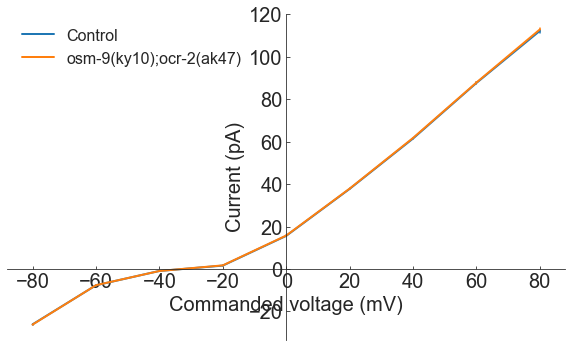

In [6]:
# plot the figures using seaborn 
# plot current peak amplitude at stable stage

sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
#sns.despine(offset=2, trim=True, top = False, right = False)
plt.rcParams.update({'font.size': 20})
plt.rcParams['svg.fonttype'] = 'none'

#%% plotting specific data from dataframe
#order = ['TU2769', 'GN932']
#xticklabels = ['WT', 'mutant']


plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
sns.despine(right=True) # remove axis spines of right and up

fig = sns.lineplot(x='stim_um', y='amp_peaks_stb', data=analysis, hue = 'worm_strain', hue_order = ["HA1134", "GN171"], err_style ='bars', lw=2)
handles, labels = fig.get_legend_handles_labels() # and next line code to remove legend title
plt.legend(handles=handles[1:], labels=labels[1:])#

# move x and y axis to 0,0 intersection
fig.spines['left'].set_position(('data', 0))
fig.spines['bottom'].set_position(('data', 0))
plt.legend(['Control', 'osm-9(ky10);ocr-2(ak47)'], frameon = False, prop={'size': 16}) # change figure label from strain name to genotype
plt.ylabel('Current (pA)')
plt.xlabel('Commanded voltage (mV)')